Overview
The project presents a data analysis from qualitative and quantitative data from the "Ferai de Ciencias y Humanidades 2024" event that happened at Universum in the NAtional Autonomous Universtiy of Mexico

The dataset is from the attendance of the Main conferences. The dat explores the etnographic data from each conferences based on the following parameters

1. Number of people
2. Number of people taking notes on notebooks
3. Number of people taking notes on Cellphone
4. Number of people doing other activities on the cellphone
5. Numbner of people recording
6. Number of people sleeping

In another dataset we have some data on the attendance such as school of origin, age, and if they where send by a teacher and which class it was. 

The objective of the data is to analyse the impact of the conferences, the type of population, and the skills of the speakers. 
The data was cleaned before uploading into a csv. 


2. Steps
In order to do this we are going to do the following steps

1. Analyze the statistics of each value per conference.

2. Graph the assistance of each conference

3. Compare the conferences that happened at the same time. 

### important Qualitative data 

The 12:00 pm and 14:00 pm conference speakers where researchers, while the 16:00 pm speakers where science communicators. 
The event was aimed at high school level. 
The conference where in a closed space and the students had to take assistance for their own teachers. 



In [1]:
from scipy import stats as st
import pandas as pd
from matplotlib import pyplot as plt 
import numpy as np
import math
import seaborn as sns

In [2]:
#import dataset


Universum_raw = pd.read_csv('ObservacionEtnograficaUniversumFCyH2024.csv')
 
#Universum_raw = pd.read_csv('ObservacionEtnograficaUniversumFCyH2024Codigo.csv')

In [5]:
Universum_raw.info(show_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Ponencia                      18 non-null     object
 1   Dia                           18 non-null     object
 2   Hora de la conferencia        18 non-null     object
 3   Total de gente                18 non-null     int64 
 4   Gente grabando                18 non-null     int64 
 5   Notas en telefono             18 non-null     int64 
 6   Notas en papel                18 non-null     int64 
 7   Otras actividades en celular  18 non-null     int64 
 8   Dormidos                      18 non-null     int64 
dtypes: int64(6), object(3)
memory usage: 1.4+ KB


In [7]:
display (Universum_raw.head(10))

,Ponencia,Dia,Hora de la conferencia,Total de gente,Gente grabando,Notas en telefono,Notas en papel,Otras actividades en celular,Dormidos
0,De cuencas a oceanos: conectando tierra y mar ...,Viernes,12:10,216,5,24,14,12,0
1,De cuencas a oceanos: conectando tierra y mar ...,Viernes,12:30,216,4,10,2,26,18
2,De cuencas a oceanos: conectando tierra y mar ...,Viernes,12:50,216,2,5,2,30,22
3,De donde viene el agua que tomamos?,Viernes,14:10,220,2,7,26,12,10
4,De donde viene el agua que tomamos?,Viernes,14:30,205,6,5,15,23,35
5,De donde viene el agua que tomamos?,Viernes,14:50,186,6,5,23,32,14
6,Conversatorio Agua pasa por mi casa,Viernes,16:10,215,12,10,13,9,0
7,Conversatorio Agua pasa por mi casa,Viernes,16:30,212,15,9,12,10,13
8,Conversatorio Agua pasa por mi casa,Viernes,16:50,201,8,12,6,9,7
9,Existe Aquaman? De la celula al organismo ente...,Sabado,12:10,219,25,11,29,22,0


In [9]:
Universum_percentages = Universum_raw
columns_to_convert = ['Gente grabando', 'Notas en telefono', 'Notas en papel', 'Otras actividades en celular', 'Dormidos']

#converte to percentages 
for col in columns_to_convert:
    Universum_percentages[col] = (Universum_percentages[col] / Universum_percentages['Total de gente']) * 100
display (Universum_percentages.head(10))


,Ponencia,Dia,Hora de la conferencia,Total de gente,Gente grabando,Notas en telefono,Notas en papel,Otras actividades en celular,Dormidos
0,De cuencas a oceanos: conectando tierra y mar ...,Viernes,12:10,216,2.314815,11.111111,6.481481,5.555556,0.000000
1,De cuencas a oceanos: conectando tierra y mar ...,Viernes,12:30,216,1.851852,4.629630,0.925926,12.037037,8.333333
2,De cuencas a oceanos: conectando tierra y mar ...,Viernes,12:50,216,0.925926,2.314815,0.925926,13.888889,10.185185
3,De donde viene el agua que tomamos?,Viernes,14:10,220,0.909091,3.181818,11.818182,5.454545,4.545455
4,De donde viene el agua que tomamos?,Viernes,14:30,205,2.926829,2.439024,7.317073,11.219512,17.073171
5,De donde viene el agua que tomamos?,Viernes,14:50,186,3.225806,2.688172,12.365591,17.204301,7.526882
6,Conversatorio Agua pasa por mi casa,Viernes,16:10,215,5.581395,4.651163,6.046512,4.186047,0.000000
7,Conversatorio Agua pasa por mi casa,Viernes,16:30,212,7.075472,4.245283,5.660377,4.716981,6.132075
8,Conversatorio Agua pasa por mi casa,Viernes,16:50,201,3.980100,5.970149,2.985075,4.477612,3.482587
9,Existe Aquaman? De la celula al organismo ente...,Sabado,12:10,219,11.415525,5.022831,13.242009,10.045662,0.000000


In [11]:
agg_funcs = ['mean','median', 'max', 'min', 'std']
metricas = ['Total de gente', 'Gente grabando', 'Notas en telefono','Notas en telefono',
            'Otras actividades en celular','Dormidos']
estadisticaData = Universum_raw.groupby('Ponencia')[metricas].agg(agg_funcs)

display (estadisticaData.head(10))

Total de gente              \
                                                             mean median  max   
Ponencia                                                                        
Conversatorio Agua pasa por mi casa                    209.333333  212.0  215   
De cuencas a oceanos: conectando tierra y mar p...     216.000000  216.0  216   
De donde viene el agua que tomamos?                    203.666667  205.0  220   
Existe Aquaman? De la celula al organismo enter...     217.333333  219.0  219   
Explorando mundos acuaticos: agua mas alla de l...     211.333333  213.0  213   
Pensar con el agua en clave feminista                  210.000000  214.0  215   

                                                                    \
                                                    min        std   
Ponencia                                                             
Conversatorio Agua pasa por mi casa                 201   7.371115   
De cuencas a oceanos: conectando tierra y mar p...  216   0.000000   
De donde viene el agua que tomamos?                 186  17.039171   
Existe Aquaman? De la celula al organismo enter...  214   2.886751   
Explorando mundos acuaticos: agua mas alla de l...  208   2.886751   
Pensar con el agua en clave feminista               201   7.810250   

                                                   Gente grabando             \
                                                             mean     median   
Ponencia                                                                       
Conversatorio Agua pasa por mi casa                      5.545656   5.581395   
De cuencas a oceanos: conectando tierra y mar p...       1.697531   1.851852   
De donde viene el agua que tomamos?                      2.353909   2.926829   
Existe Aquaman? De la celula al organismo enter...       9.454615  11.415525   
Explorando mundos acuaticos: agua mas alla de l...       7.571927   7.692308   
Pensar con el agua en clave feminista                    2.548310   2.790698   

                                                                         \
                                                          max       min   
Ponencia                                                                  
Conversatorio Agua pasa por mi casa                  7.075472  3.980100   
De cuencas a oceanos: conectando tierra y mar p...   2.314815  0.925926   
De donde viene el agua que tomamos?                  3.225806  0.909091   
Existe Aquaman? De la celula al organismo enter...  14.611872  2.336449   
Explorando mundos acuaticos: agua mas alla de l...  11.267606  3.755869   
Pensar con el agua en clave feminista                2.985075  1.869159   

                                                              ...  \
                                                         std  ...   
Ponencia                                                      ...   
Conversatorio Agua pasa por mi casa                 1.547996  ...   
De cuencas a oceanos: conectando tierra y mar p...  0.707188  ...   
De donde viene el agua que tomamos?                 1.260147  ...   
Existe Aquaman? De la celula al organismo enter...  6.368311  ...   
Explorando mundos acuaticos: agua mas alla de l...  3.757315  ...   
Pensar con el agua en clave feminista               0.596138  ...   

                                                   Otras actividades en celular  \
                                                                           mean   
Ponencia                                                                          
Conversatorio Agua pasa por mi casa                                    4.460213   
De cuencas a oceanos: conectando tierra y mar p...                    10.493827   
De donde viene el agua que tomamos?                                   11.292786   
Existe Aquaman? De la celula al organismo enter...                     8.424729   
Explorando mundos acuaticos: agua mas alla de l...                     3.785964   
Pensar 

#we group each conference separetely so we can plot them. 
We want to see the individuals behaviour in each conference. 




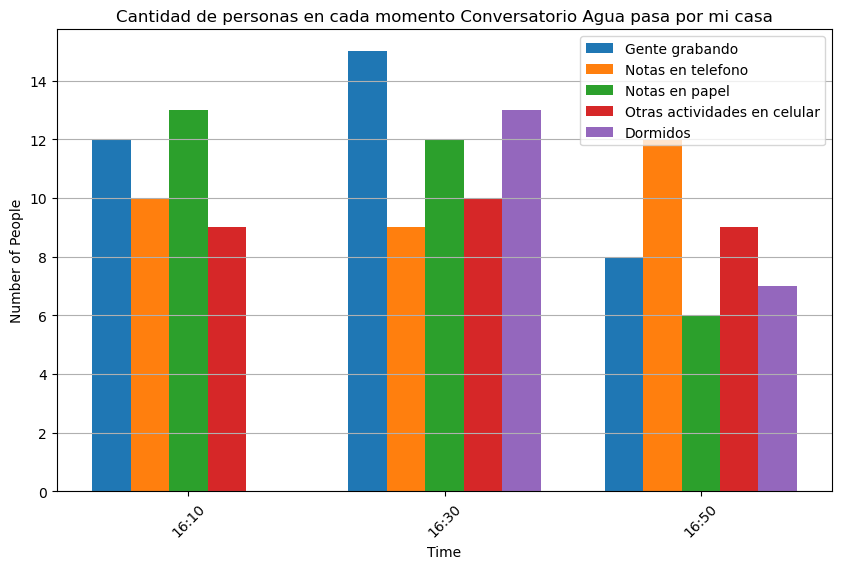

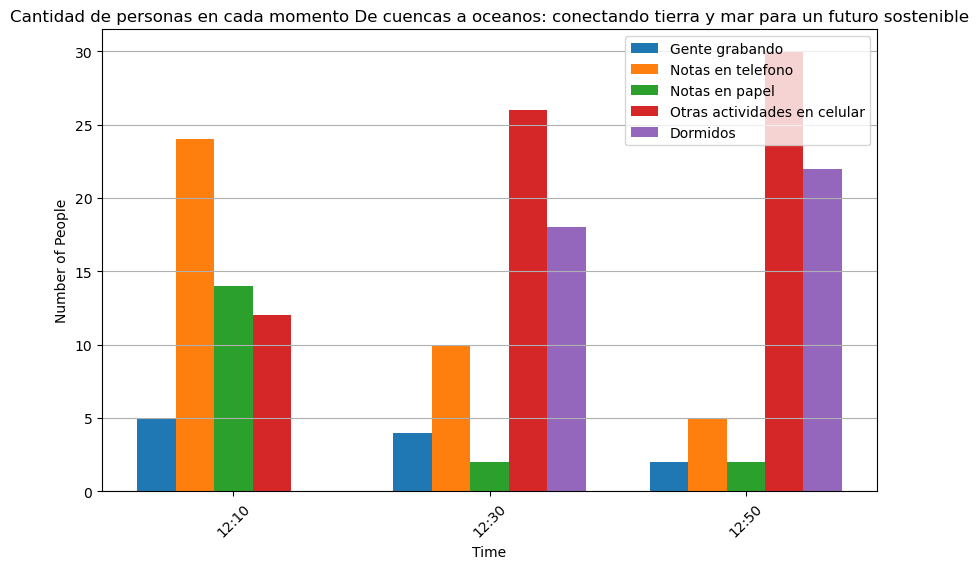

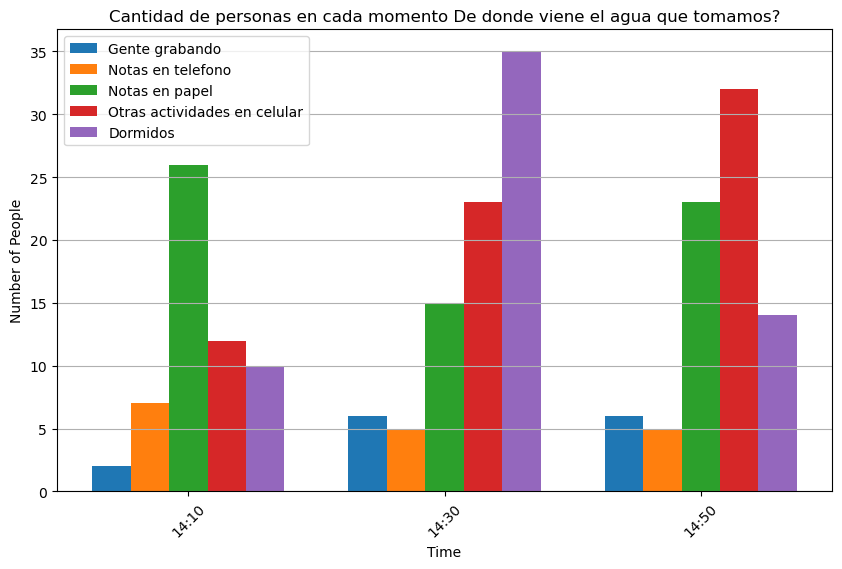

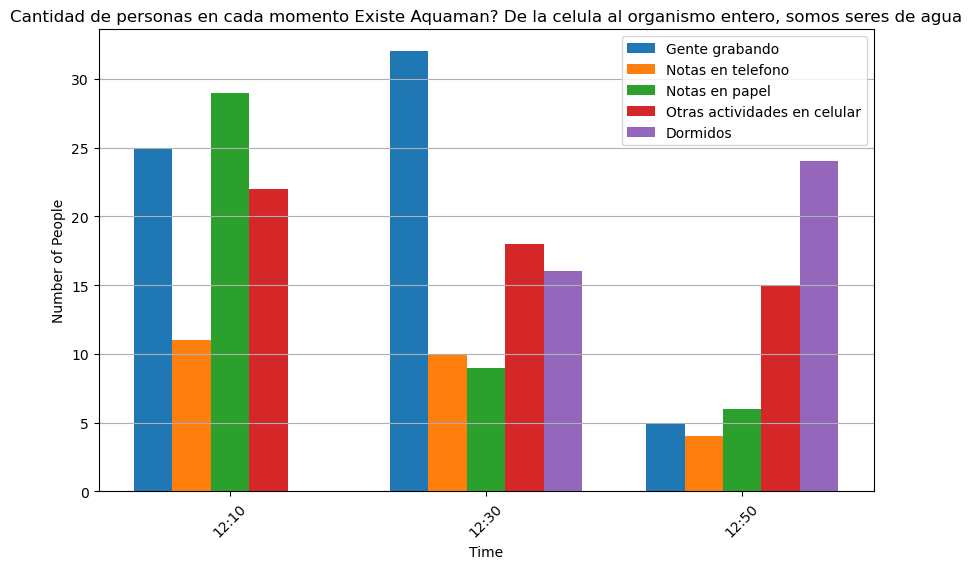

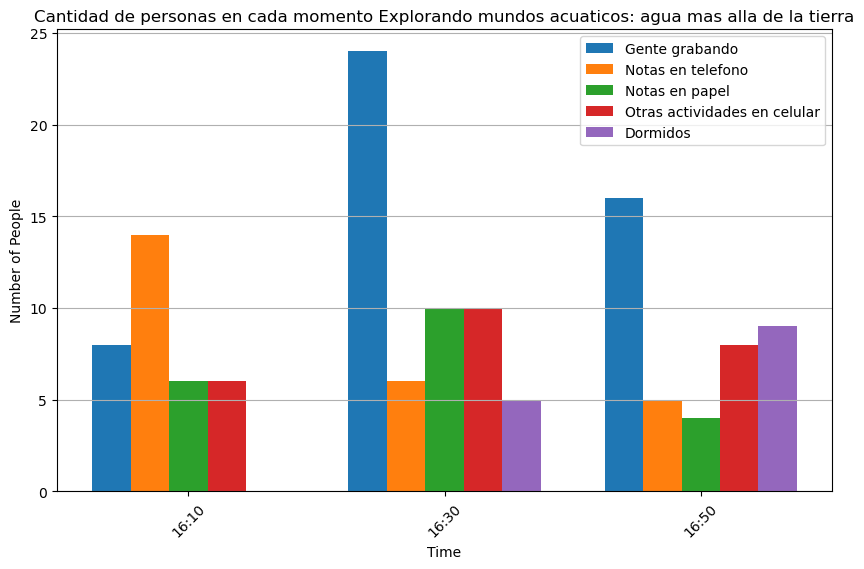

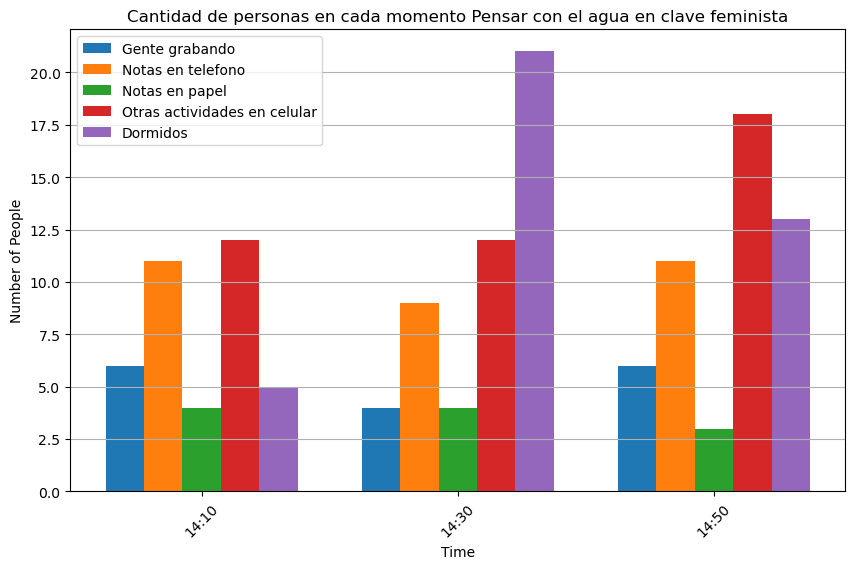

In [25]:
for ponencia, group in Universum_raw.groupby('Ponencia'):
    plt.figure(figsize=(10, 6))
    plt.title(f"Cantidad de personas en cada momento {ponencia}")
    plt.xlabel("Time")
    plt.ylabel("Number of People")
    
    # Exclude 'Total de gente' column and plot the rest
    columns_to_plot = ['Gente grabando', 'Notas en telefono', 'Notas en papel', 'Otras actividades en celular', 'Dormidos']
    
    # Use bar plots
    bar_width = 0.15  # Width of each bar
    x_indexes = range(len(group['Hora de la conferencia']))
    
    for i, col in enumerate(columns_to_plot):
        # Offset each bar to avoid overlap
        plt.bar(
            [x + i * bar_width for x in x_indexes],
            group[col],
            width=bar_width,
            label=col
        )
    
    # Customize the x-axis with time labels
    plt.xticks(
        [x + bar_width * (len(columns_to_plot) / 2 - 0.5) for x in x_indexes],
        group['Hora de la conferencia'],
        rotation=45
    )
    
    plt.legend()
    plt.grid(axis='y')  # Add grid lines for the y-axis
    plt.show()

### Same hour comparision

Afterwards we want to graph how each conference looks against each other

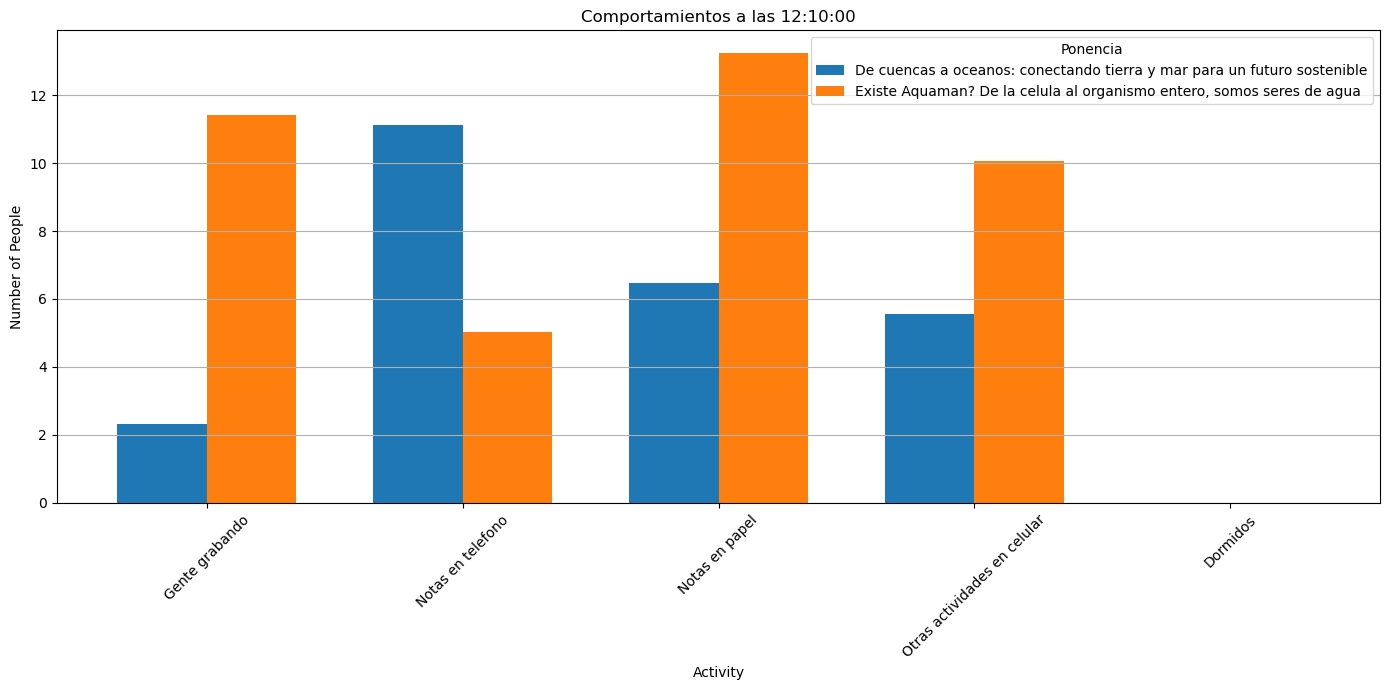

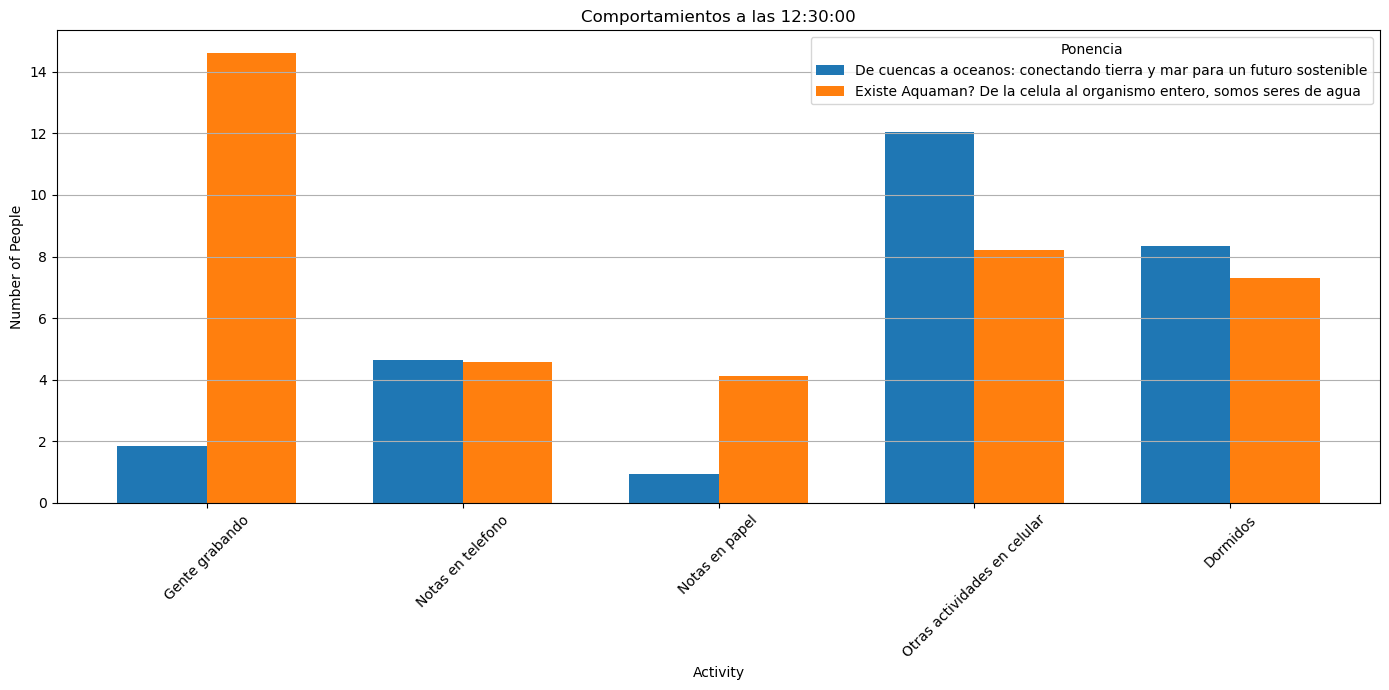

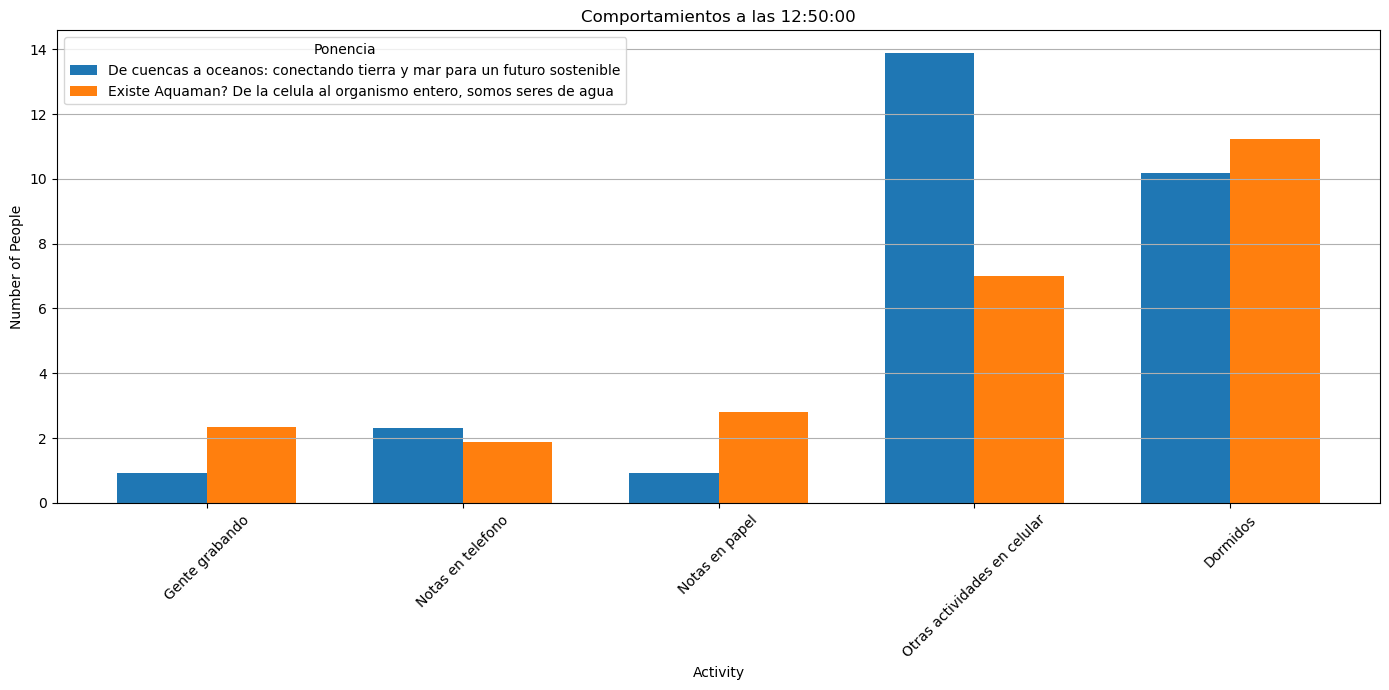

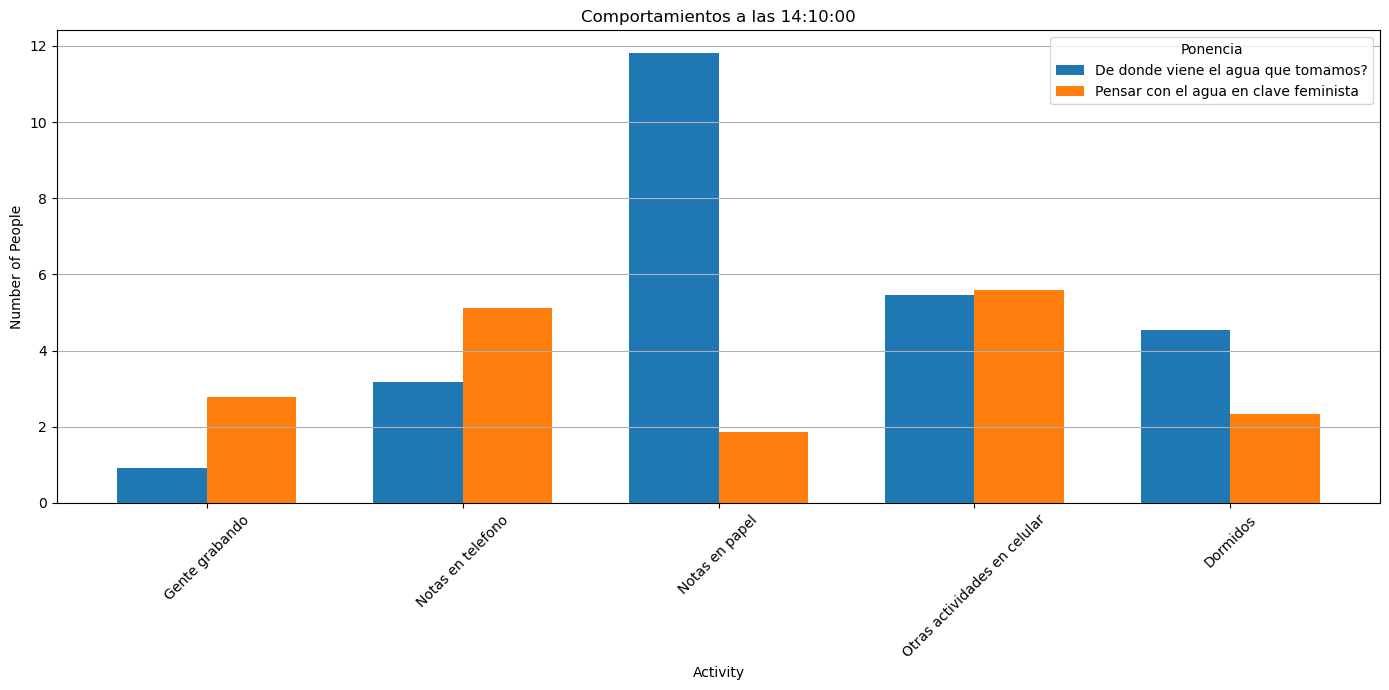

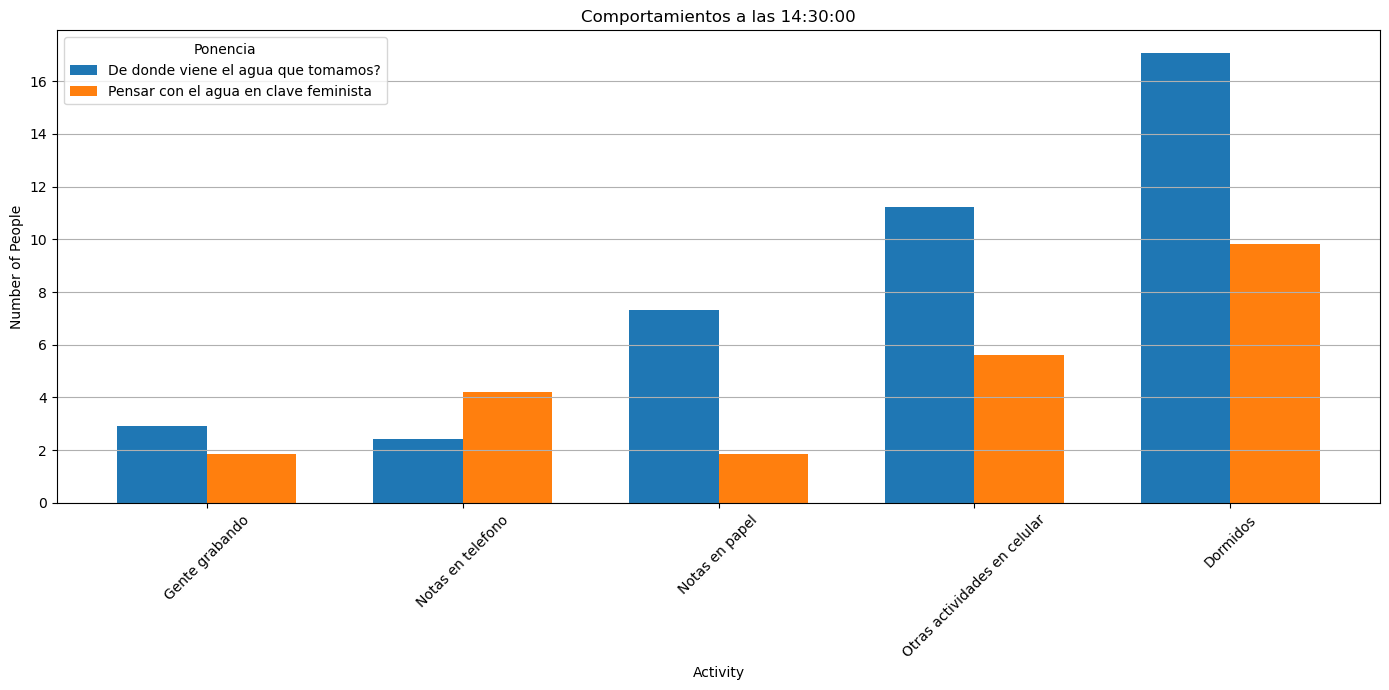

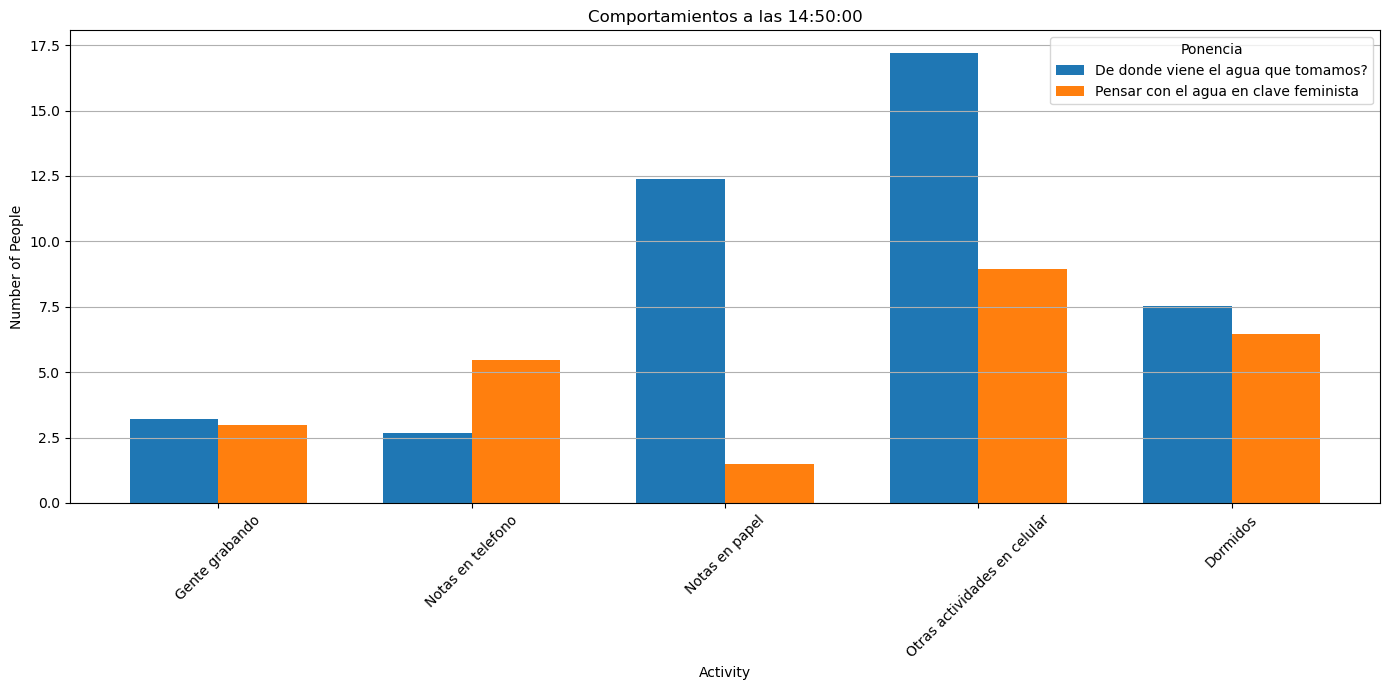

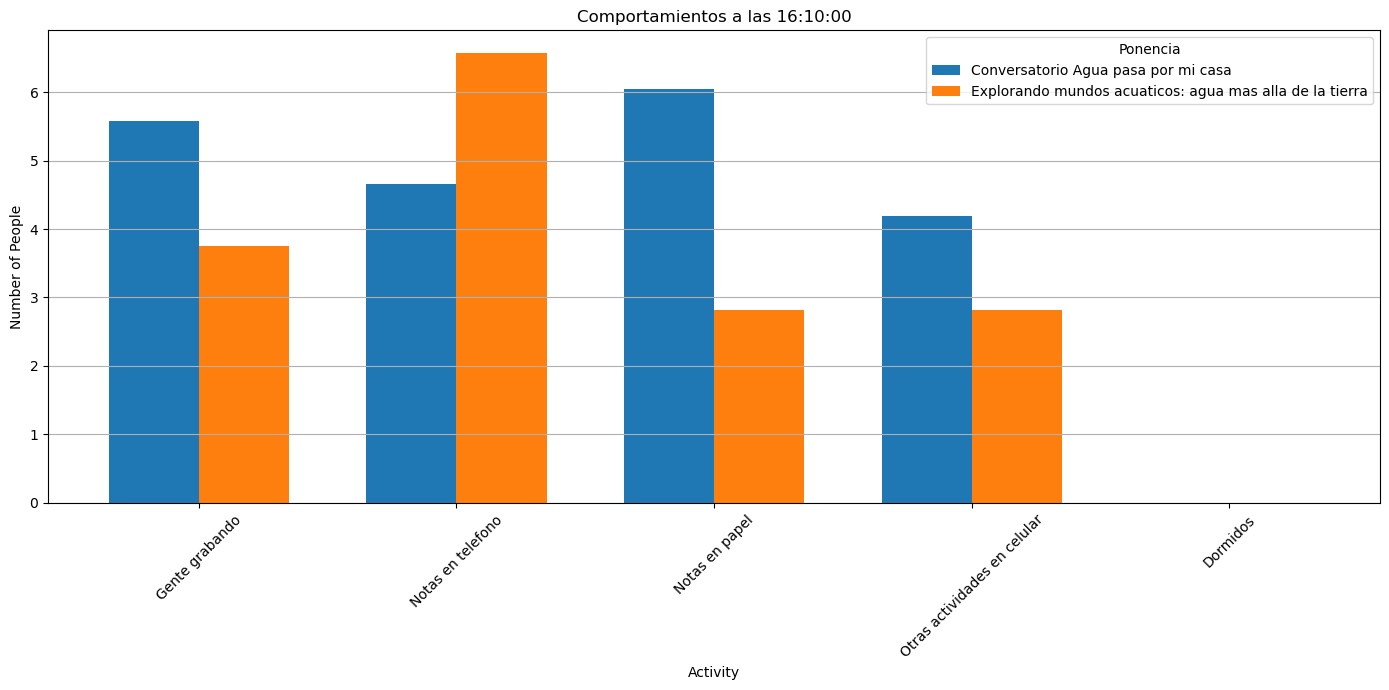

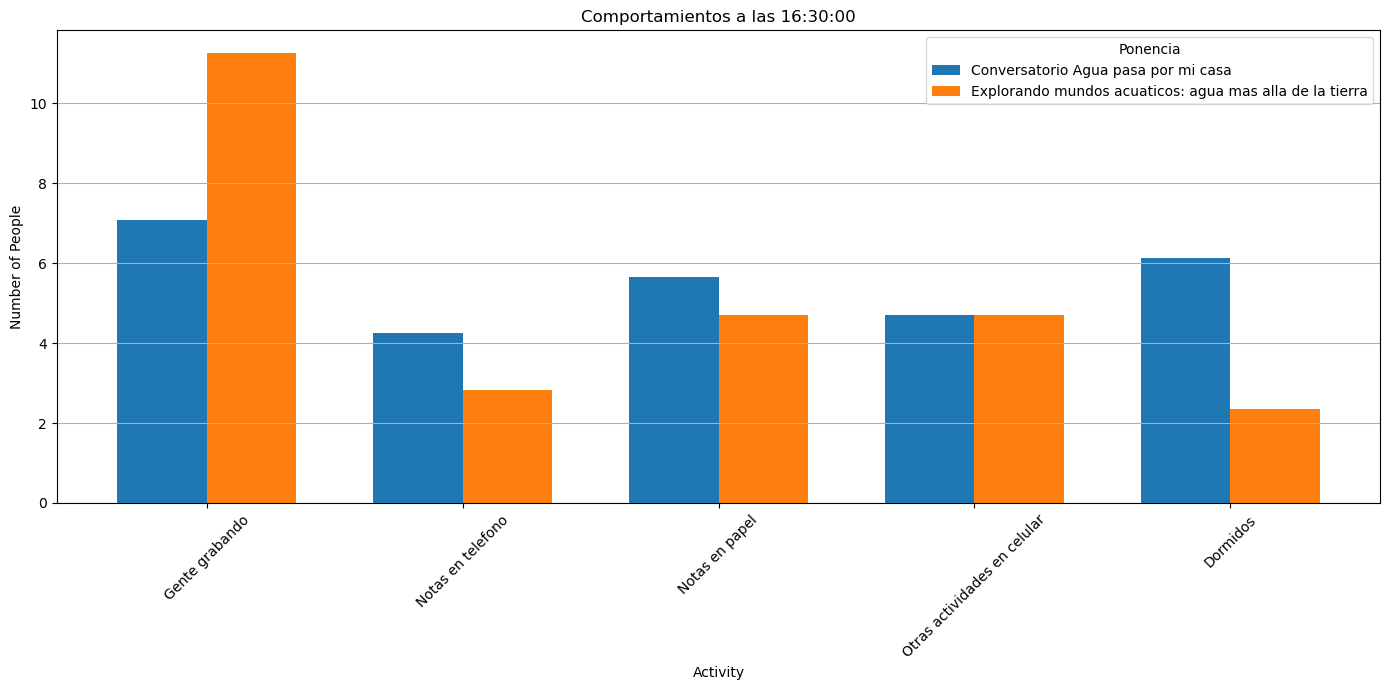

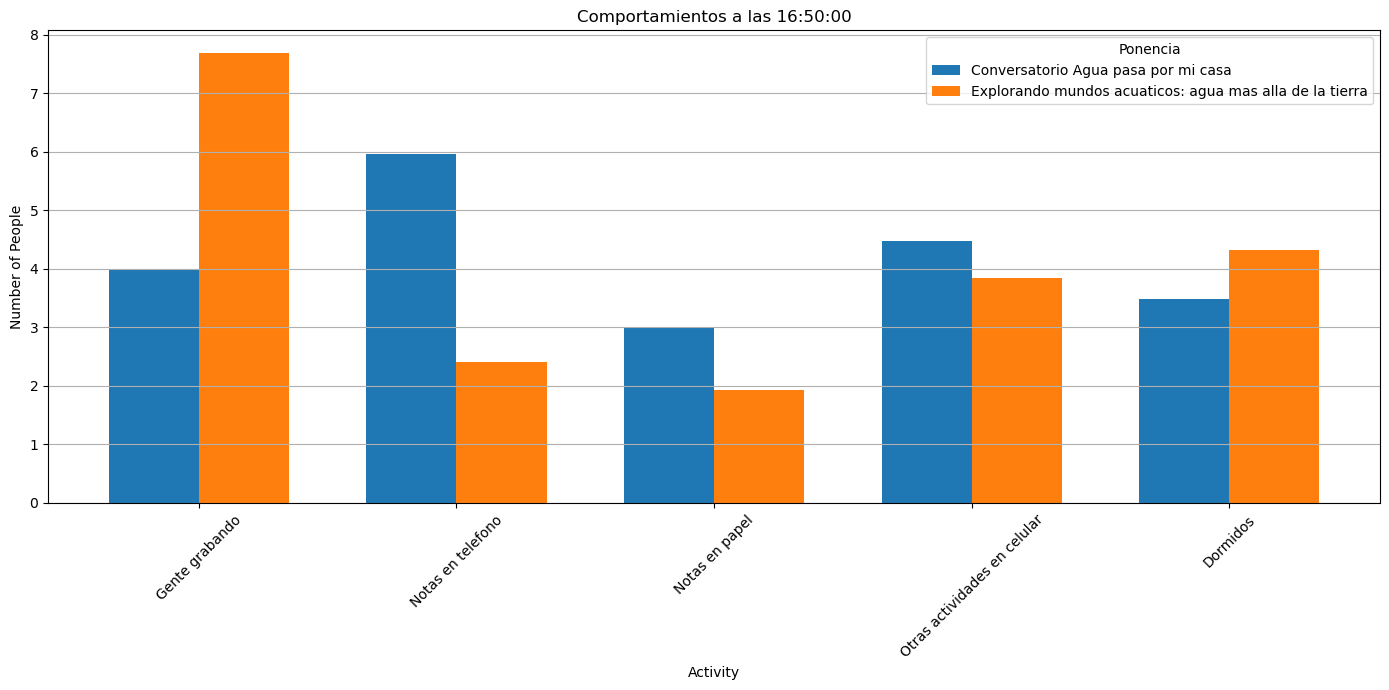

In [16]:
universum_timestamped = Universum_raw
universum_timestamped['Hora de la conferencia'] = pd.to_datetime(Universum_raw['Hora de la conferencia'], format='%H:%M').dt.time
# Convert 'Hora de la conferencia' to time

# Columns to compare
columns_to_plot = ['Gente grabando', 'Notas en telefono', 'Notas en papel', 'Otras actividades en celular', 'Dormidos']

# Unique timestamps
unique_timestamps = universum_timestamped['Hora de la conferencia'].unique()

# Plotting for each timestamp
for timestamp in unique_timestamps:
    # Filter data for the current timestamp
    timestamp_data = universum_timestamped[universum_timestamped['Hora de la conferencia'] == timestamp]
    
    plt.figure(figsize=(14, 7))
    plt.title(f"Comportamientos a las {timestamp}")
    plt.xlabel("Activity")
    plt.ylabel("Number of People")
    
    # X positions for activities
    x_positions = range(len(columns_to_plot))
    bar_width = 0.35  # Width of each bar

    for i, ponencia in enumerate(timestamp_data['Ponencia'].unique()):
        # Data for the current timestamp and conference
        conference_data = timestamp_data[timestamp_data['Ponencia'] == ponencia][columns_to_plot].sum()
        
        # Plot bars for the current conference
        plt.bar(
            [x + i * bar_width for x in x_positions],
            conference_data.values,
            width=bar_width,
            label=f"{ponencia}"
        )
    
    # Customize x-axis
    plt.xticks(
        [x + bar_width / 2 for x in x_positions],
        columns_to_plot,
        rotation=45
    )
    
    plt.legend(title="Ponencia")
    plt.grid(axis='y')  # Add grid lines for the y-axis
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()


From the first graphs we can see some patterns. 

The number of sleeping people at the 14:00 pm conference was related to the content of the conference as the second didn't had the same pattern. 

Both 16:00 conferences had similar behaviour which could be related to the speaker of the conference , since those where science communicators instead of researchers. 





## early analysis

As of 16/Jan/25 I am waiting on the rest of the data regarding the intervierws, assistance questionaries, and other markers from the organizers. I will update the project as I get more data. 